In [1]:
!pip install pycaret

  Using cached cufflinks-0.17.3.tar.gz (81 kB)
  Using cached pyod-0.9.0.tar.gz (105 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached plotly-5.1.0-py2.py3-none-any.whl (20.6 MB)
  Using cached kmodes-0.11.0-py2.py3-none-any.whl (18 kB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached pandas_profiling-3.0.0-py2.py3-none-any.whl (248 kB)
  Using cached lightgbm-3.2.1-py3-none-win_amd64.whl (1.0 MB)
  Using cached mlxtend-0.18.

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.


  Using cached databricks-cli-0.14.3.tar.gz (54 kB)
  Using cached waitress-2.0.0-py3-none-any.whl (56 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached prometheus_flask_exporter-0.18.2.tar.gz (22 kB)
  Using cached docker-5.0.0-py2.py3-none-any.whl (146 kB)
  Using cached alembic-1.4.1.tar.gz (1.1 MB)
  Using cached sqlparse-0.4.1-py3-none-any.whl (42 kB)
  Using cached multimethod-1.4-py2.py3-none-any.whl (7.3 kB)
  Using cached websocket_client-1.1.0-py2.py3-none-any.whl (68 kB)
  Using cached Mako-1.1.4-py2.py3-none-any.whl (75 kB)
  Using cached python_editor-1.0.4-py3-none-any.whl (4.9 kB)
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68727 sha256=f781a855934baa02a5a902a9c572129d736cf0e5f605d80fdd7fb4ade2835a54
  Stored in directory: c:\users\abhin\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
  Created wheel for pyod: filename=pyod-0.9.0-py3-none-any.whl size=1225


pyldavis 3.3.1 requires numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
pyldavis 3.3.1 requires pandas>=1.2.0, but you'll have pandas 1.1.3 which is incompatible.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data_unseen = df.sample(frac=0.1, random_state=42)      # Sample 10% of the data to become the unseen test set
data = df.drop(data_unseen.index)                       # Use the remaining 90% as the training (& validation) data

df.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Model Training & Validation: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Model Training & Validation: (256326, 31)
Unseen Data For Predictions: (28481, 31)


In [9]:
data_unseen.to_csv("../data/test.csv")

In [7]:
from pycaret.classification import *

In [8]:
import mlflow

In [10]:

expt_basic = setup(
    data = data, 
    target = 'Class', 
    session_id=42,                      # Random seed to ensure reproducibility of the experiment with the same data
    train_size=0.8,                     # 80% training data & 20% held-out validation data
    ignore_features=["Time"],
    numeric_imputation="median",        # "mean" by default
    normalize=True,
    normalize_method="minmax",
    categorical_imputation="mode",      # "constant" (not_available) by default
    feature_selection = True,
    log_experiment = True,
    experiment_name = "Credit Card Fraud - Expt 2",
    log_plots = True
)

,Description,Value
0,session_id,42
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(256326, 31)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [12]:
best = compare_models(sort="F1", exclude=["gpc", "mlp", "rbfsvm"], fold=5,n_select = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9995,0.9414,0.7789,0.9457,0.8532,0.8530,0.8575,6.7700
knn,K Neighbors Classifier,0.9995,0.9120,0.7761,0.9069,0.8357,0.8355,0.8383,28.1780
rf,Random Forest Classifier,0.9995,0.9399,0.7534,0.9382,0.8341,0.8338,0.8397,19.0920
lda,Linear Discriminant Analysis,0.9993,0.8964,0.7447,0.8552,0.7939,0.7936,0.7966,0.4920
ada,Ada Boost Classifier,0.9991,0.9739,0.6710,0.7897,0.7241,0.7236,0.7268,8.4340
dt,Decision Tree Classifier,0.9990,0.8566,0.7138,0.7247,0.7187,0.7182,0.7185,2.3520
gbc,Gradient Boosting Classifier,0.9990,0.7307,0.5807,0.7989,0.6720,0.6715,0.6804,43.1820
lr,Logistic Regression,0.9990,0.9775,0.5037,0.8479,0.6291,0.6287,0.6515,1.5660
svm,SVM - Linear Kernel,0.9989,0.0000,0.4559,0.8422,0.5904,0.5899,0.6185,0.1800
ridge,Ridge Classifier,0.9989,0.0000,0.4247,0.8326,0.5612,0.5607,0.5934,0.1320


In [13]:
best

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform')]

In [14]:
models = []
for i in best:
    
    models.append(tune_model(i, fold=3, optimize="F1"))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9994,0.9023,0.7119,0.9130,0.8000,0.7997,0.8059
1,0.9994,0.9143,0.7436,0.9062,0.8169,0.8166,0.8206
2,0.9995,0.9362,0.7966,0.9307,0.8584,0.8582,0.8608
Mean,0.9995,0.9176,0.7507,0.9167,0.8251,0.8248,0.8291
SD,0.0001,0.0141,0.0350,0.0103,0.0246,0.0246,0.0232


In [15]:
models

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                      class_weight='balanced_subsample', criterion='entropy',
                      max_depth=1, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                      metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                      weights='distance')]

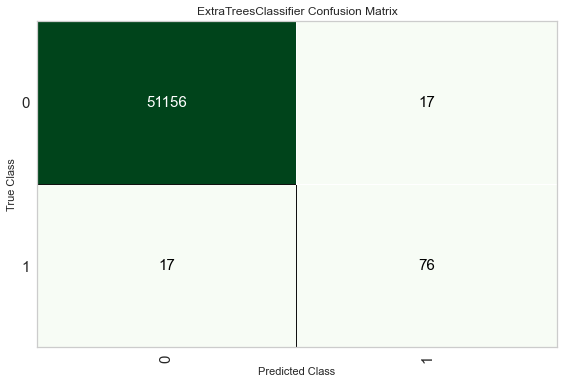

In [16]:
plot_model(models[0], plot="confusion_matrix")

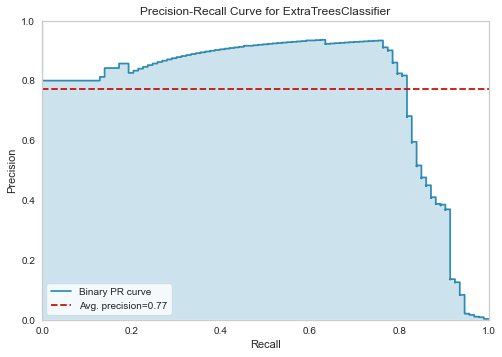

In [17]:
plot_model(models[0], plot="pr")

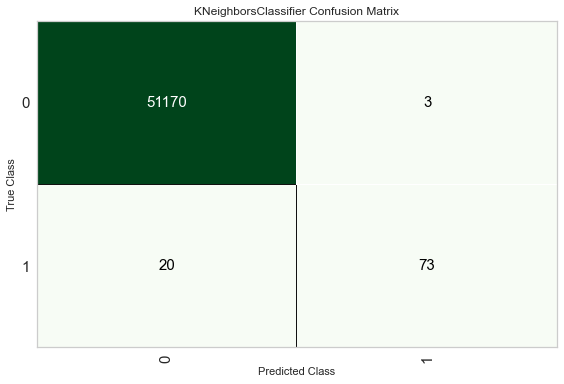

In [18]:
plot_model(models[1], plot="confusion_matrix")

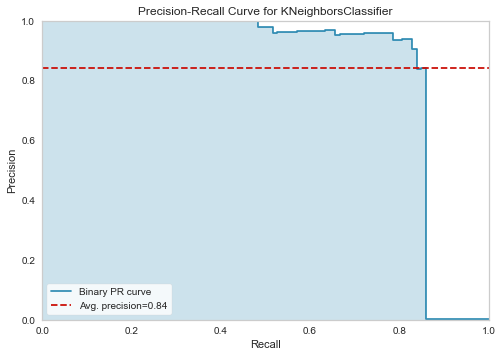

In [19]:
plot_model(models[1], plot="pr")

In [53]:
save_model(models[0], "../models/et_expt2")
save_model(models[1], "../models/knn_expt2")

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Time'], id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                  Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                     n_jobs=-1, random_state=42,
                                                     subclass='binary',
                                      

In [25]:
predict_model(models[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9993,0.9872,0.8172,0.8172,0.8172,0.8169,0.8169


,V27,V10,V11,V28,V18,V24,Amount,V25,V13,V4,...,V1,V12,V5,V26,V15,V7,V8,Class,Label,Score
0,0.237936,0.620637,0.353227,0.313313,0.691043,0.408336,0.001627,0.586449,0.202719,0.279181,...,0.976197,0.677384,0.758575,0.509990,0.424058,0.260717,0.793060,0,0,0.7344
1,0.239128,0.621970,0.366098,0.313599,0.671345,0.404540,0.001978,0.593651,0.303327,0.304752,...,0.975573,0.706619,0.761292,0.366363,0.399509,0.262987,0.791850,0,0,0.7271
2,0.236777,0.585425,0.312970,0.315363,0.676261,0.350242,0.000139,0.610515,0.492396,0.228826,...,0.967989,0.746720,0.772153,0.461251,0.269036,0.261399,0.760404,0,0,0.7645
3,0.235096,0.604686,0.290382,0.313561,0.683071,0.200029,0.002500,0.574769,0.347102,0.205031,...,0.945385,0.679554,0.766867,0.574280,0.408387,0.267685,0.792747,0,0,0.7534
4,0.241231,0.606619,0.267643,0.315391,0.645976,0.396676,0.008635,0.529567,0.430508,0.266167,...,0.949159,0.690770,0.756842,0.491876,0.473437,0.270933,0.789076,0,0,0.7598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51261,0.237987,0.615562,0.439400,0.305240,0.758523,0.361894,0.000035,0.556757,0.406996,0.313693,...,0.941391,0.717586,0.767371,0.354909,0.385349,0.265545,0.798625,0,0,0.6556
51262,0.245971,0.575446,0.335844,0.309854,0.608403,0.351354,0.037189,0.525621,0.376458,0.233594,...,0.925785,0.724677,0.737247,0.539714,0.258019,0.285936,0.792515,0,0,0.7235
51263,0.237156,0.610472,0.299267,0.314461,0.685551,0.215754,0.015451,0.594436,0.542663,0.275597,...,0.966064,0.747045,0.762410,0.527552,0.355113,0.263753,0.791716,0,0,0.7581
51264,0.238455,0.613196,0.321581,0.311579,0.574943,0.160283,0.002335,0.561850,0.345819,0.247442,...,0.989025,0.729263,0.768947,0.428965,0.333696,0.263351,0.793093,0,0,0.7369


In [26]:
predict_model(models[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9996,0.9299,0.7849,0.9605,0.8639,0.8637,0.8681


,V27,V10,V11,V28,V18,V24,Amount,V25,V13,V4,...,V1,V12,V5,V26,V15,V7,V8,Class,Label,Score
0,0.237936,0.620637,0.353227,0.313313,0.691043,0.408336,0.001627,0.586449,0.202719,0.279181,...,0.976197,0.677384,0.758575,0.509990,0.424058,0.260717,0.793060,0,0,1.0
1,0.239128,0.621970,0.366098,0.313599,0.671345,0.404540,0.001978,0.593651,0.303327,0.304752,...,0.975573,0.706619,0.761292,0.366363,0.399509,0.262987,0.791850,0,0,1.0
2,0.236777,0.585425,0.312970,0.315363,0.676261,0.350242,0.000139,0.610515,0.492396,0.228826,...,0.967989,0.746720,0.772153,0.461251,0.269036,0.261399,0.760404,0,0,1.0
3,0.235096,0.604686,0.290382,0.313561,0.683071,0.200029,0.002500,0.574769,0.347102,0.205031,...,0.945385,0.679554,0.766867,0.574280,0.408387,0.267685,0.792747,0,0,1.0
4,0.241231,0.606619,0.267643,0.315391,0.645976,0.396676,0.008635,0.529567,0.430508,0.266167,...,0.949159,0.690770,0.756842,0.491876,0.473437,0.270933,0.789076,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51261,0.237987,0.615562,0.439400,0.305240,0.758523,0.361894,0.000035,0.556757,0.406996,0.313693,...,0.941391,0.717586,0.767371,0.354909,0.385349,0.265545,0.798625,0,0,1.0
51262,0.245971,0.575446,0.335844,0.309854,0.608403,0.351354,0.037189,0.525621,0.376458,0.233594,...,0.925785,0.724677,0.737247,0.539714,0.258019,0.285936,0.792515,0,0,1.0
51263,0.237156,0.610472,0.299267,0.314461,0.685551,0.215754,0.015451,0.594436,0.542663,0.275597,...,0.966064,0.747045,0.762410,0.527552,0.355113,0.263753,0.791716,0,0,1.0
51264,0.238455,0.613196,0.321581,0.311579,0.574943,0.160283,0.002335,0.561850,0.345819,0.247442,...,0.989025,0.729263,0.768947,0.428965,0.333696,0.263351,0.793093,0,0,1.0


In [27]:
final_blended_et = finalize_model(models[0])
final_blended_knn = finalize_model(models[1])

In [29]:
!pip install boto3

In [30]:
deploy_model(model = final_blended_et, model_name = 'et_deployed', platform = 'aws', authentication = {'bucket' : 'mlopsdvc200040008'})

Model Successfully Deployed on AWS S3


In [31]:
deploy_model(model = final_blended_knn, model_name = 'knn_deployed', platform = 'aws', authentication = {'bucket' : 'mlopsdvc200040008'})

Model Successfully Deployed on AWS S3


In [32]:
loaded_model_et = load_model('et_deployed', platform = 'aws', authentication = { 'bucket' : 'mlopsdvc200040008' })
loaded_model_knn = load_model('knn_deployed', platform = 'aws', authentication = { 'bucket' : 'mlopsdvc200040008' })

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [39]:
import mlflow
import uvicorn

In [ ]:
!mlflow ui

In [51]:
!uvicorn main:app --host=0.0.0.0 --port=8080

^C
